
📌 Lineer Regresyon Nedir?

Bir bağımsız değişken (x) ile bağımlı değişken (y) arasındaki ilişkiyi bir doğru denklemi ile açıklar:


y = b_0 + b_1x + \varepsilon


Burada:
	•	 y  → Tahmin edilen bağımlı değişken (çıktı),
	•	 x  → Bağımsız değişken (girdi),
	•	 b_0  → Sabit terim (intercept),
	•	 b_1  → Eğim katsayısı (slope),
	•	 \varepsilon  → Hata terimi (modelin tahmin edemediği rastgele gürültü).

Bu formül, bir değişkenli (basit) lineer regresyonu temsil eder. Eğer birden fazla bağımsız değişken varsa çoklu lineer regresyon olur:


y = b_0 + b_1x_1 + b_2x_2 + … + b_nx_n + \varepsilon


🎯 Lineer Regresyonun Amacı Nedir?

Amaç, veriye en iyi uyan doğruyu bularak, yeni girdiler için doğru tahminler yapmaktır.

Bunu yapmak için En Küçük Kareler Yöntemi (Ordinary Least Squares - OLS) kullanılır. Bu yöntem, hata terimini (\varepsilon) minimize eden b_0 ve b_1 katsayılarını bulur.

In [3]:

import numpy as np
import matplotlib.pyplot as plt
from sklearn.linear_model import LinearRegression

In [4]:
# Örnek veri

X = np.array([1, 2, 3, 4, 5]).reshape(-1, 1)  # Bağımsız değişken (girdi)
y = np.array([2, 3, 5, 6, 8])  # Bağımlı değişken (çıktı)


In [5]:
# Modeli oluştur ve eğit 
model = LinearRegression()
model.fit(X, y)

LinearRegression()

In [6]:
# Tahmin yap
y_pred = model.predict(X)

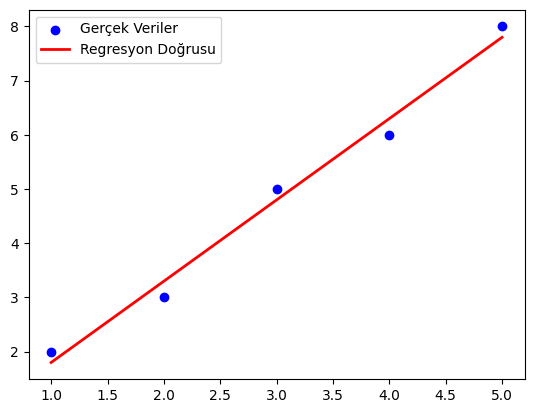

In [7]:
# Grafiği çiz
plt.scatter(X, y, color="blue", label="Gerçek Veriler")
plt.plot(X, y_pred, color="red", linewidth=2, label="Regresyon Doğrusu")
plt.legend()
plt.show()

--------------------------------------------------------------------------------------------------

In [9]:
import torch 
from torch.autograd import Variable
import torch.nn as nn
import warnings 
warnings.filterwarnings("ignore")


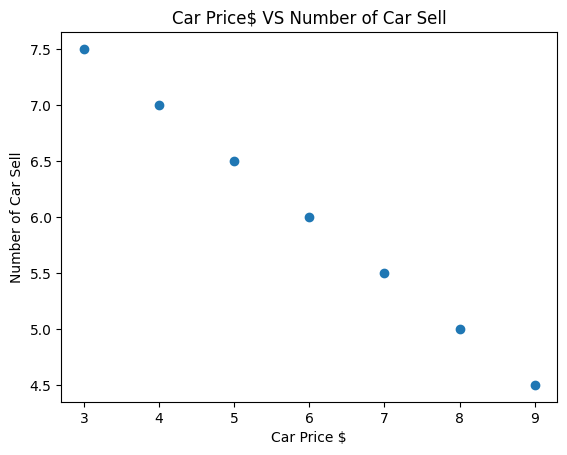

In [10]:
car_prices_array = [3,4,5,6,7,8,9]
car_price_np = np.array(car_prices_array,dtype=np.float32)
car_price_np = car_price_np.reshape(-1,1)
car_price_tensor = Variable(torch.from_numpy(car_price_np))

# lets define number of car sell
number_of_car_sell_array = [ 7.5, 7, 6.5, 6.0, 5.5, 5.0, 4.5]
number_of_car_sell_np = np.array(number_of_car_sell_array,dtype=np.float32)
number_of_car_sell_np = number_of_car_sell_np.reshape(-1,1)
number_of_car_sell_tensor = Variable(torch.from_numpy(number_of_car_sell_np))

# lets visualize our data
import matplotlib.pyplot as plt
plt.scatter(car_prices_array,number_of_car_sell_array)
plt.xlabel("Car Price $")
plt.ylabel("Number of Car Sell")
plt.title("Car Price$ VS Number of Car Sell")
plt.show()

1-LinearRegression sınıfı oluştur
2-bu LinearRegression sınıfından modeli tanımlayın 
3-MSE: Ortalama kare hatası 
4-Optimizasyon (SGD: stokastik gradyan inişi) 
5-Geri yayılım 
6-Tahmin

In [12]:
class LinearRegression(nn.Module):
    def __init__(self,input_size,output_size):
        super(LinearRegression,self).__init__()
        self.linear = nn.Linear(input_dim,output_dim)

    def forward(self,x):
        return self.linear(x)
    
        

In [13]:
input_dim = 1
output_dim = 1
model = LinearRegression(input_dim,output_dim)

In [14]:
mse = nn.MSELoss()

In [15]:
learning_rate = 0.02
optimizer = torch.optim.SGD(model.parameters(),lr = learning_rate)

In [16]:
loss_list = []
iteration_number = 1001
for iteration in range(iteration_number):
        
    # optimization
    optimizer.zero_grad() 
    
    # Forward to get output
    results = model(car_price_tensor)
    
    # Calculate Loss
    loss = mse(results, number_of_car_sell_tensor)
    
    # backward propagation
    loss.backward()
    
    # Updating parameters
    optimizer.step()
    
    # store loss
    loss_list.append(loss.data)
    
    # print loss
    if(iteration % 50 == 0):
        print('epoch {}, loss {}'.format(iteration, loss.data))

epoch 0, loss 9.269707679748535
epoch 50, loss 4.6573286056518555
epoch 100, loss 3.14715313911438
epoch 150, loss 2.126662492752075
epoch 200, loss 1.4370759725570679
epoch 250, loss 0.9710926413536072
epoch 300, loss 0.6562075018882751
epoch 350, loss 0.443427175283432
epoch 400, loss 0.2996425926685333
epoch 450, loss 0.2024809867143631
epoch 500, loss 0.1368248462677002
epoch 550, loss 0.09245816618204117
epoch 600, loss 0.06247830018401146
epoch 650, loss 0.042219288647174835
epoch 700, loss 0.028529416769742966
epoch 750, loss 0.0192782673984766
epoch 800, loss 0.013026969507336617
epoch 850, loss 0.008802643045783043
epoch 900, loss 0.005948505364358425
epoch 950, loss 0.004019604064524174
epoch 1000, loss 0.0027162653859704733


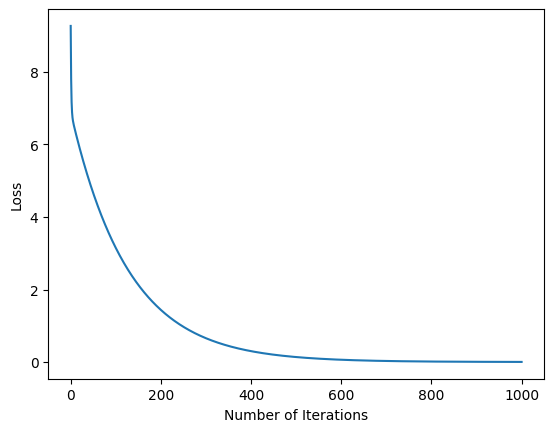

In [17]:
plt.plot(range(iteration_number),loss_list)
plt.xlabel("Number of Iterations")
plt.ylabel("Loss")
plt.show()